### Classification


#### KNN - own implementation

In [1]:
from scipy.spatial import distance
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from six import StringIO
import pydot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
iris = datasets.load_iris()
iris.data = (iris.data - iris.data.mean()) / iris.data.std()

tst_size = 0.3

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=tst_size)

k = 5
predictions = []

for i in range(0, len(features_test)):
    dist = []
    first = 0
    second = 0
    third = 0
    for j in range(0, len(features_train)):
        dst = distance.euclidean(features_test[i], features_train[j])
        tmp = (dst, labels_train[j])
        dist.append(tmp)
    dist.sort()
    dist = dist[:k]
    mtx = np.matrix(dist)
    mtx = mtx[:, 1]
    for i in mtx:
        if i == 0:
            first += 1
        elif i == 1:
            second += 1
        else:
            third += 1
    if first >= second and first >= third:
        predictions.append(0)
    elif second >= first and second >= third:
        predictions.append(1)
    else:
        predictions.append(2)

output = accuracy_score(labels_test, predictions)
print('Accuracy score:', output)

Accuracy score: 0.9555555555555556


#### KNN - sklearn

In [3]:
iris = datasets.load_iris()
iris.data = (iris.data - iris.data.mean()) / iris.data.std()

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

k = 5

knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')
knn.fit(features_train, labels_train)
predictions = knn.predict(features_test)

output = accuracy_score(labels_test, predictions)
print('Accuracy score:', output)

Accuracy score: 0.9777777777777777


Minimum error: 0.0 at K = 0


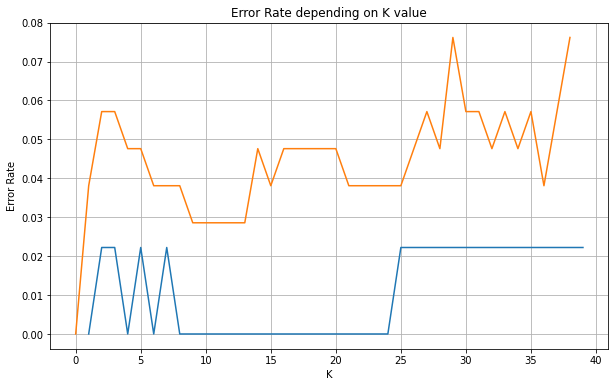

In [4]:
error_rate = []
error_rate_j = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(features_train,labels_train)
    pred_i = knn.predict(features_test)
    error_rate.append(np.mean(pred_i != labels_test))
    pred_j = knn.predict(features_train)
    error_rate_j.append(np.mean(pred_j != labels_train))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, error_rate_j)
plt.title('Error Rate depending on K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()
print("Minimum error:",min(error_rate),"at K =",error_rate.index(min(error_rate)))

#### Decision Trees

In [5]:
iris = datasets.load_iris()

clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])
clf.predict_proba(iris.data[:1, :])

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())

graph[0].write_pdf('iris.pdf')

Number of digits:  5000
Number of pixels in one picture:  400


C:\Users\pobox\AppData\Roaming\Python\Python37\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


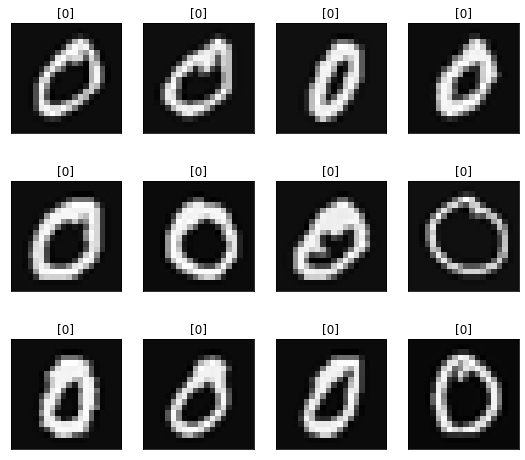

In [6]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

dane = loadmat('mnist.mat')

X = dane['X']
y = dane['y']

for i in range(X.shape[0]):
    X[i, :] = X[i, :] / np.std(X[i, :])

y[np.where(y == 10)] = 0

h = 20
w = 20

print("Number of digits: ", X.shape[0])
print('Number of pixels in one picture: ', X.shape[1])

plot_mnist(X, y, h, w)
plt.show()

features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size=0.3)

DEPTH = 10
tree = DecisionTreeClassifier(max_depth = DEPTH)
tree.fit(features_train, labels_train)
predictions = tree.predict(features_test)

In [7]:
f1 = f1_score(labels_test, predictions, average='micro')
print('F1 score:', f1)

F1 score: 0.7786666666666666


In [8]:
c_matrix = confusion_matrix(labels_test, predictions)
print('Confusion matrix:\n', c_matrix)

Confusion matrix:
 [[135   0   3   0   1   4   1   2   3   2]
 [  0 137   1   1   4   0   1   1   4   1]
 [  5   9 105   7   4   3   8   4  11   1]
 [  1   4   9 115   1  12   1   2   8   2]
 [  2   3   3   1 104   6   8   1   3   9]
 [  1   4   2   6   2 116  11   2   7   8]
 [  4   1   7   1   3   1 123   0   5   1]
 [  3   3   7   7   1   4   0 115   1  16]
 [  0   5  12   7   2   4   3   1  93   6]
 [  2   0   1   7   5   3   0   4   5 125]]


In [9]:
report = classification_report(labels_test, predictions)
print('Classification report:', report)

Classification report:               precision    recall  f1-score   support

           0       0.88      0.89      0.89       151
           1       0.83      0.91      0.87       150
           2       0.70      0.67      0.68       157
           3       0.76      0.74      0.75       155
           4       0.82      0.74      0.78       140
           5       0.76      0.73      0.74       159
           6       0.79      0.84      0.81       146
           7       0.87      0.73      0.80       157
           8       0.66      0.70      0.68       133
           9       0.73      0.82      0.77       152

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500

